# Data visualisation

<img style="float: right;" src="./lecture_images/heatmap.png" width="40%">

Data visualisation is mapping quantitative or qualitative information into the position, size, colour, or shape of graphical elements.

Biologists use data visualisation to:

* Understand and interpret large and complex sets of information
* To look for and present patterns and relationships in the data
* Identify outliers or anomalies in the data
* Communicating research finding and results to others, as it can make the data more accessible and understandable to a wider audience.


### Intended Learning Outcomes

By the end of this lecture, you should be able to: 

- Use Pandas to selectively analyze and summarize data
- Apply fundamental principles for creating effective data visualizations
- Identify and select the most suitable graphics for representing various forms and combinations of data.
- Complete this week's data analysis workshop.


In [1]:
# importing modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#make figures large

plt.rcParams["figure.figsize"] = (12,8)

# Excel vs CSV: Why use CSV?

In Workshop 1, we used Excel to enter our data, and we also encountered some of the problems with using Spreadhseet software for entering data. 



<img src='./lecture_images/excel1.jpeg'>


# Excel vs CSV: Why use CSV?



<img src='./lecture_images/excel2.jpeg'>

# Excel vs CSV: Why use CSV?

<img src='./lecture_images/excel3.jpeg'>

# Loading data and checking the data


<img style="float: right;" src="./lecture_images/paul-carroll-Y-nyDv3TWm0-unsplash.jpg" width="33%">

# Palmer Penguins



This dataset contains information about penguins from three different species that were observed on the Palmer Archipelago, Antarctica. The data includes information about the penguins' species, island, bill length and depth, flipper length, body mass, and sex.

The data originally appeared in:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081


In [2]:
#reading in the data
penguin_df=pd.read_csv("palmer_penguins.csv")

# To remove lines with missing values ('NaN'), run .dropna()
#penguin_df.dropna(inplace=True)

display(penguin_df)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
#checking the data
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


# Column selection

You can select a specific column from a DataFrame using the df['column_name'] notation.

In [4]:
penguin_df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
# Accessing individual columns
penguin_df['island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339        Dream
340        Dream
341        Dream
342        Dream
343        Dream
Name: island, Length: 344, dtype: object

# .unique( )

In [6]:
#Getting all unique values in a column fo categorical variables
print(penguin_df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


# .value_counts()
`value_counts()` is a method in the pandas library for counting the number of occurrences of each unique value in a column of a DataFrame or a Series.

In [7]:
# .value_counts()
penguin_df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
#Class exercise: How many male penguins and female penguins were included in the study?


# .query()

.query() allows us to filter a dataframe using some conditions - i.e. only return rows that match some criteria

In [9]:
#Only return rows where species is 'Chinstrap' and sex is 'female'
penguin_df.query('species=="Chinstrap" & sex=="female"')

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
276,277,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,2007
279,280,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007
281,282,Chinstrap,Dream,45.2,17.8,198.0,3950.0,female,2007
282,283,Chinstrap,Dream,46.1,18.2,178.0,3250.0,female,2007
284,285,Chinstrap,Dream,46.0,18.9,195.0,4150.0,female,2007
286,287,Chinstrap,Dream,46.6,17.8,193.0,3800.0,female,2007
288,289,Chinstrap,Dream,47.0,17.3,185.0,3700.0,female,2007
290,291,Chinstrap,Dream,45.9,17.1,190.0,3575.0,female,2007
293,294,Chinstrap,Dream,58.0,17.8,181.0,3700.0,female,2007
294,295,Chinstrap,Dream,46.4,18.6,190.0,3450.0,female,2007


# .groupby()


In [10]:
#What is the mean beak length of each penguin species?
penguin_grouped_by_species=penguin_df.groupby('species')['bill_length_mm'].mean().reset_index()
penguin_grouped_by_species

,species,bill_length_mm
0,Adelie,38.791391
1,Chinstrap,48.833824
2,Gentoo,47.504878


WOOCLAP: TGUORC


In [11]:
from IPython.display import IFrame
IFrame("https://app.wooclap.com/events/TGUORC/questions/65aafcb0b1b47f8b77fd45a4", 900,500)


<img style="float: right;" src="./lecture_images/pie.png" width="33%"> 

Lesson 1: Pie charts are generally poor as humans are not as good at comparing angles as they are at comparing the size of bars.

Lesson 2: Always label axes and give unit



# Effective Data Visualisation

 There are a few key principles to keep in mind when creating visualisations:
1. **Choose the right chart type**: Different chart types are best suited for different types of data AND different numbers of data points.  
2. **Use clear and accurate labels**: Have clear and accurate labels, including axis labels and data points. 
3. **Use appropriate scales**: Using the right scale is important for ensuring that your visualisations are accurate and easy to interpret. For example, using a log scale can help to better represent data with a wide range of values.
4. **Use appropriate visual encodings**: Different visual encodings, such as position, length, and color, can be used to represent different types of data. 
5. **Avoid clutter**: Keep your visualisations simple and avoid clutter.



# Choosing types of plot

There are several factors that can influence the choice of plot in data visualization, including:
<img style="float: right;" src="./chart-chooser-2020.pdf" width="50%"> 

* **Type of data**
* **Number of variables**
* **Number of data points**
* **Purpose of the visualization**

Resources: 

https://www.data-to-viz.com/

https://www.python-graph-gallery.com/

[Chart Chooser](chart-chooser-2020.pdf)





# Types of variable
    
* Categorical or Numerical
* Subdivided into:
    * Categorical nominal (e.g. eye colour)
    * Categorical ordinal (e.g. Disease severity: mild, moderate, severe, or Stage of development: egg, larva, pupa, adult)
    * Numerical discrete
    * Numerical continuous

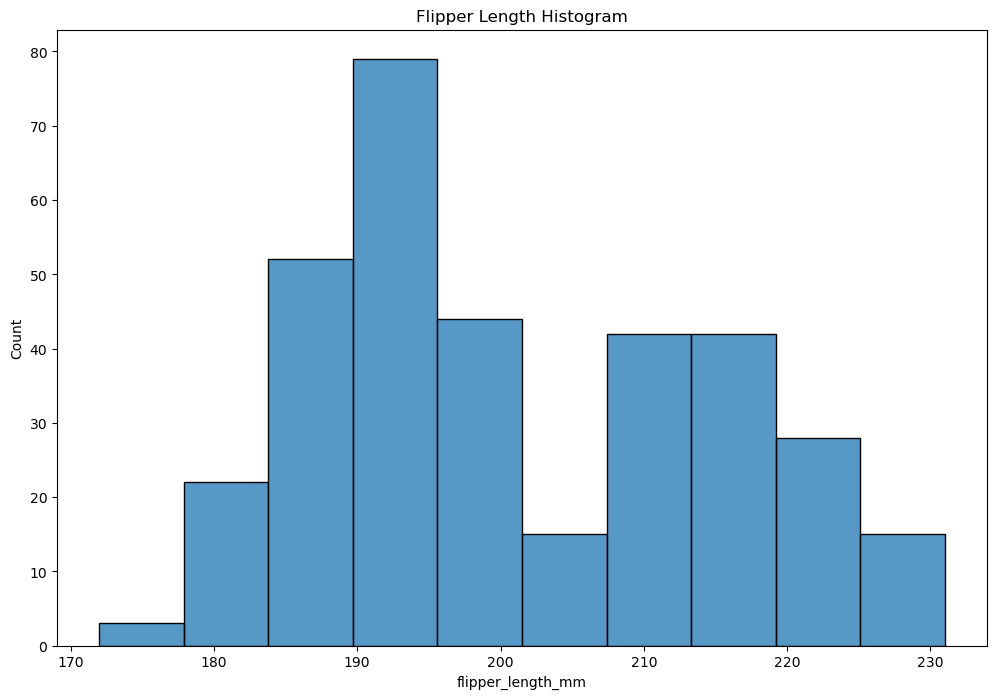

In [12]:
##Single Numberical Variable
# Histogram
sns.histplot(penguin_df['flipper_length_mm'], kde=False)
plt.title('Flipper Length Histogram')
plt.show()

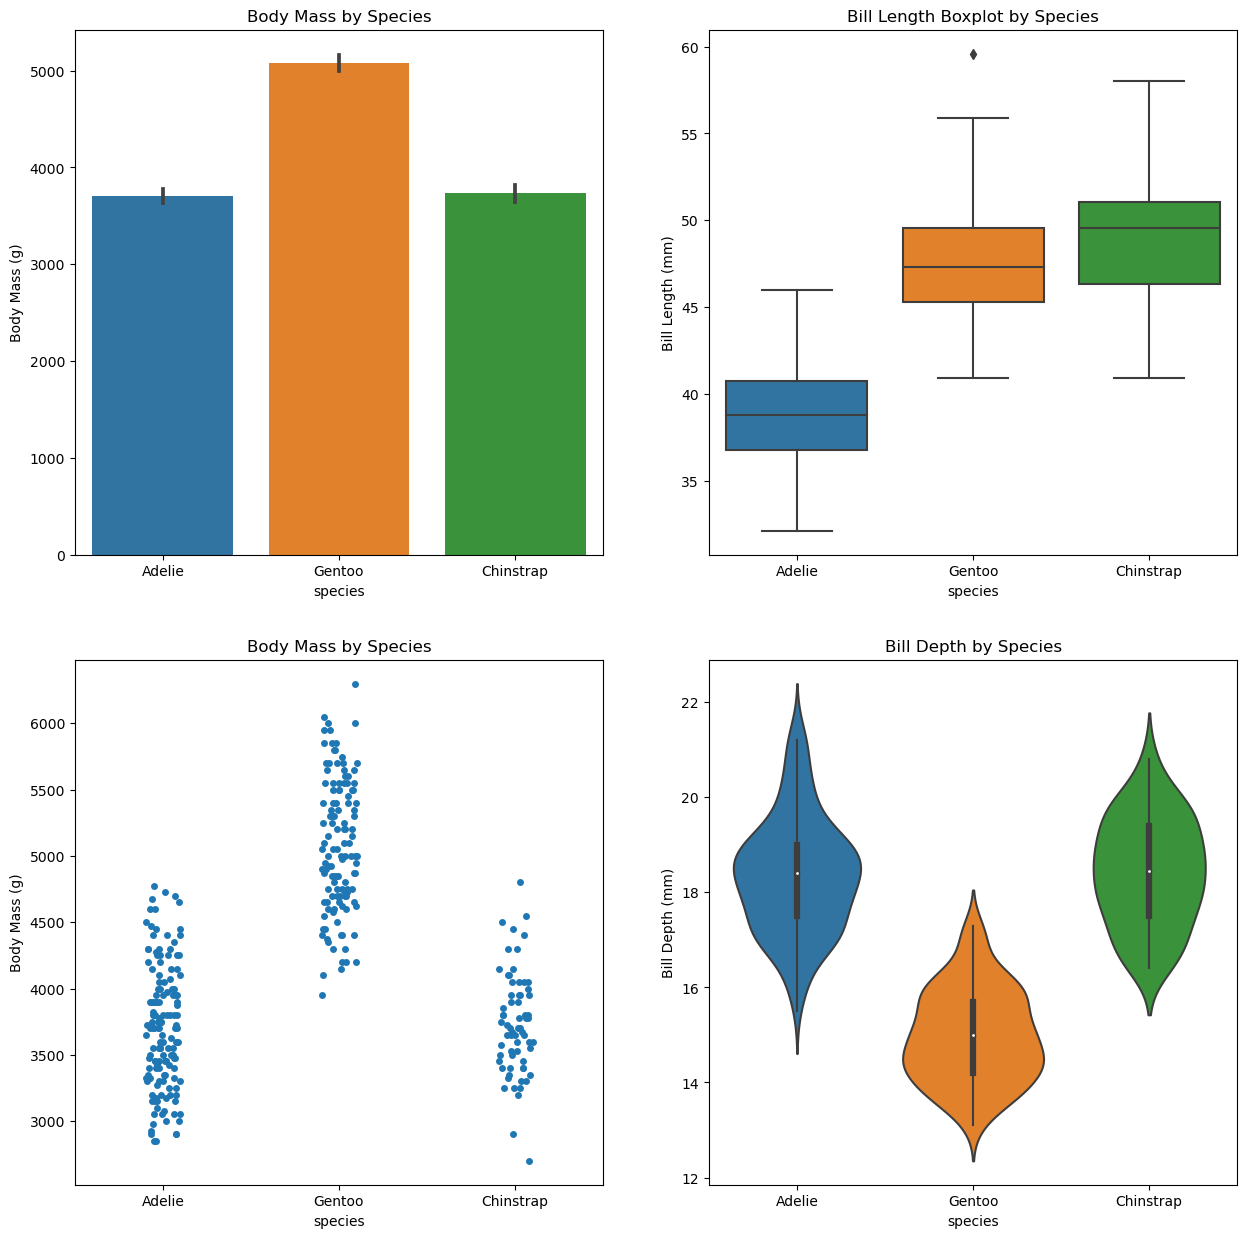

In [13]:
##1 categorical, 1 numerical variable 

# Create a figure with multiple subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 15))  # 3 rows, 2 columns

# Bar Chart
sns.barplot(x='species', y='body_mass_g', data=penguin_df, ax=ax[0, 0])
ax[0, 0].set_title('Body Mass by Species')
ax[0, 0].set_ylabel('Body Mass (g)')

# Swarmplot
sns.stripplot(x='species', y='body_mass_g', data=penguin_df, ax=ax[1, 0])
ax[1, 0].set_title('Body Mass by Species')
ax[1, 0].set_ylabel('Body Mass (g)')

# Box Plot
sns.boxplot(x='species', y='bill_length_mm', data=penguin_df, ax=ax[0, 1])
ax[0, 1].set_title('Bill Length Boxplot by Species')
ax[0, 1].set_ylabel('Bill Length (mm)')

# Violin Plot
sns.violinplot(x='species', y='bill_depth_mm', data=penguin_df, ax=ax[1, 1])
ax[1, 1].set_title('Bill Depth by Species')
ax[1, 1].set_ylabel('Bill Depth (mm)')

plt.show()

Text(0.5, 1.0, 'Flipper Length vs. Body Mass Scatterplot')

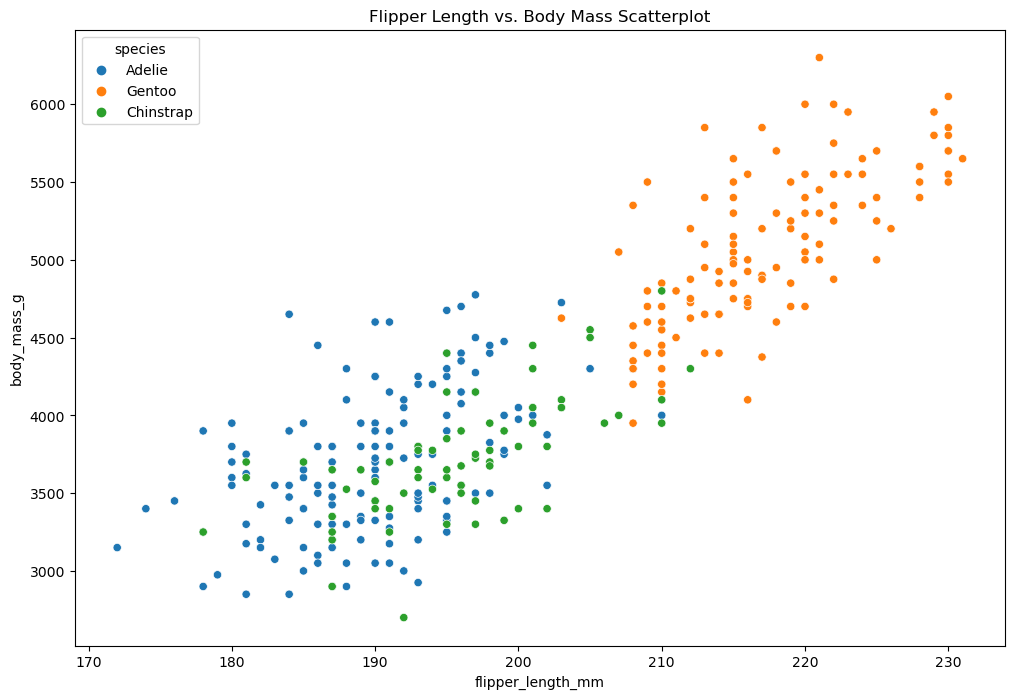

In [14]:
# 2 numerical variables

# Scatter Plot
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguin_df)
plt.title('Flipper Length vs. Body Mass Scatterplot')


# Chocolate Consumption, Cognitive Function, and Nobel Laureates
<img style="float: left;" src="./lecture_images/nobel_chocolate.jpg" width="60%">
<img style="float: right;" src="./lecture_images/nejm_cover.png" width="40%">

# Single variable over time

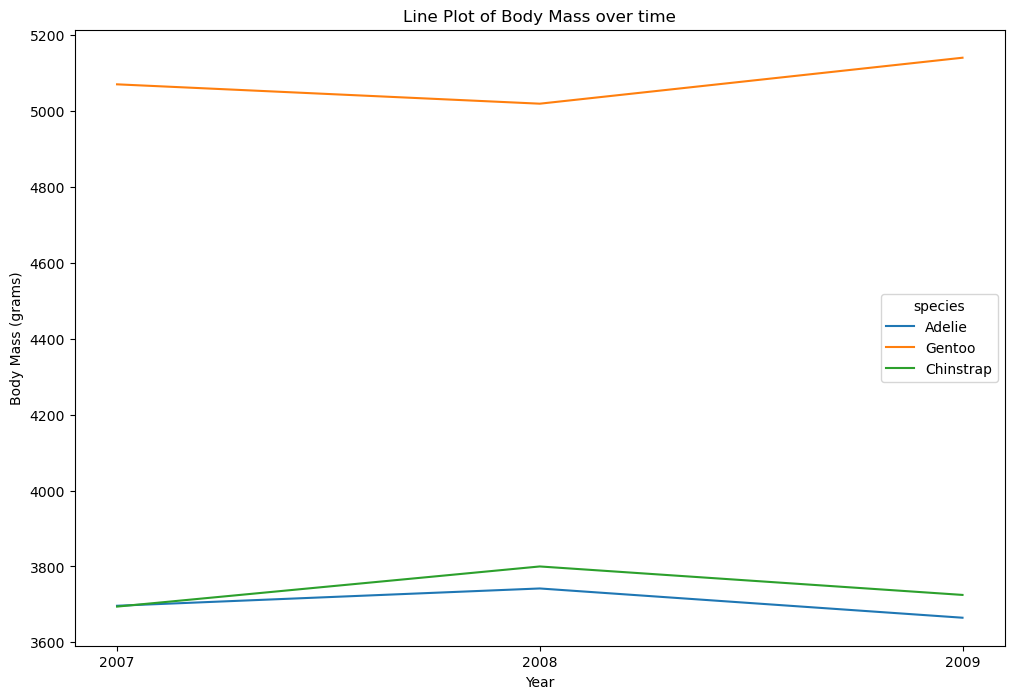

In [15]:
sns.lineplot(x='year', y='body_mass_g', data=penguin_df, hue='species', errorbar=None)
plt.xlabel('Year')
plt.ylabel('Body Mass (grams)')
plt.title('Line Plot of Body Mass over time')
#Set x ticks to only show years
plt.xticks(range(min(penguin_df['year']), max(penguin_df['year'])+1))
plt.show()

# Spatial Data



In [16]:
malaria_df=pd.read_csv('Pfalciparum-data.csv')
malaria_df

,ISO3,Name,Admin Level,Metric,Units,Year,Value
0,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2010,1.176667
1,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2011,1.053869
2,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2012,0.213129
3,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2013,0.367701
4,AFG,Afghanistan,admin0,Incidence Rate,Cases per Thousand,2014,0.653501
...,...,...,...,...,...,...,...
3493,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2016,17.548997
3494,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2017,26.484462
3495,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2018,14.745261
3496,ZWE,Zimbabwe,admin0,Mortality Rate,Deaths per 100 Thousand,2019,11.955043


In [17]:
#restrict to 2017 data and mortality data only
malaria_df_2017=malaria_df.query("Year==2017 and Metric=='Mortality Rate'")
malaria_df_2017

,ISO3,Name,Admin Level,Metric,Units,Year,Value
29,AFG,Afghanistan,admin0,Mortality Rate,Deaths per 100 Thousand,2017,1.748803
62,DZA,Algeria,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.000000
95,AGO,Angola,admin0,Mortality Rate,Deaths per 100 Thousand,2017,31.942156
128,ARG,Argentina,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.000000
161,ARM,Armenia,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.000000
...,...,...,...,...,...,...,...
3362,VEN,Venezuela,admin0,Mortality Rate,Deaths per 100 Thousand,2017,1.706701
3395,VNM,Vietnam,admin0,Mortality Rate,Deaths per 100 Thousand,2017,0.038276
3428,YEM,Yemen,admin0,Mortality Rate,Deaths per 100 Thousand,2017,33.776802
3461,ZMB,Zambia,admin0,Mortality Rate,Deaths per 100 Thousand,2017,22.449049


/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


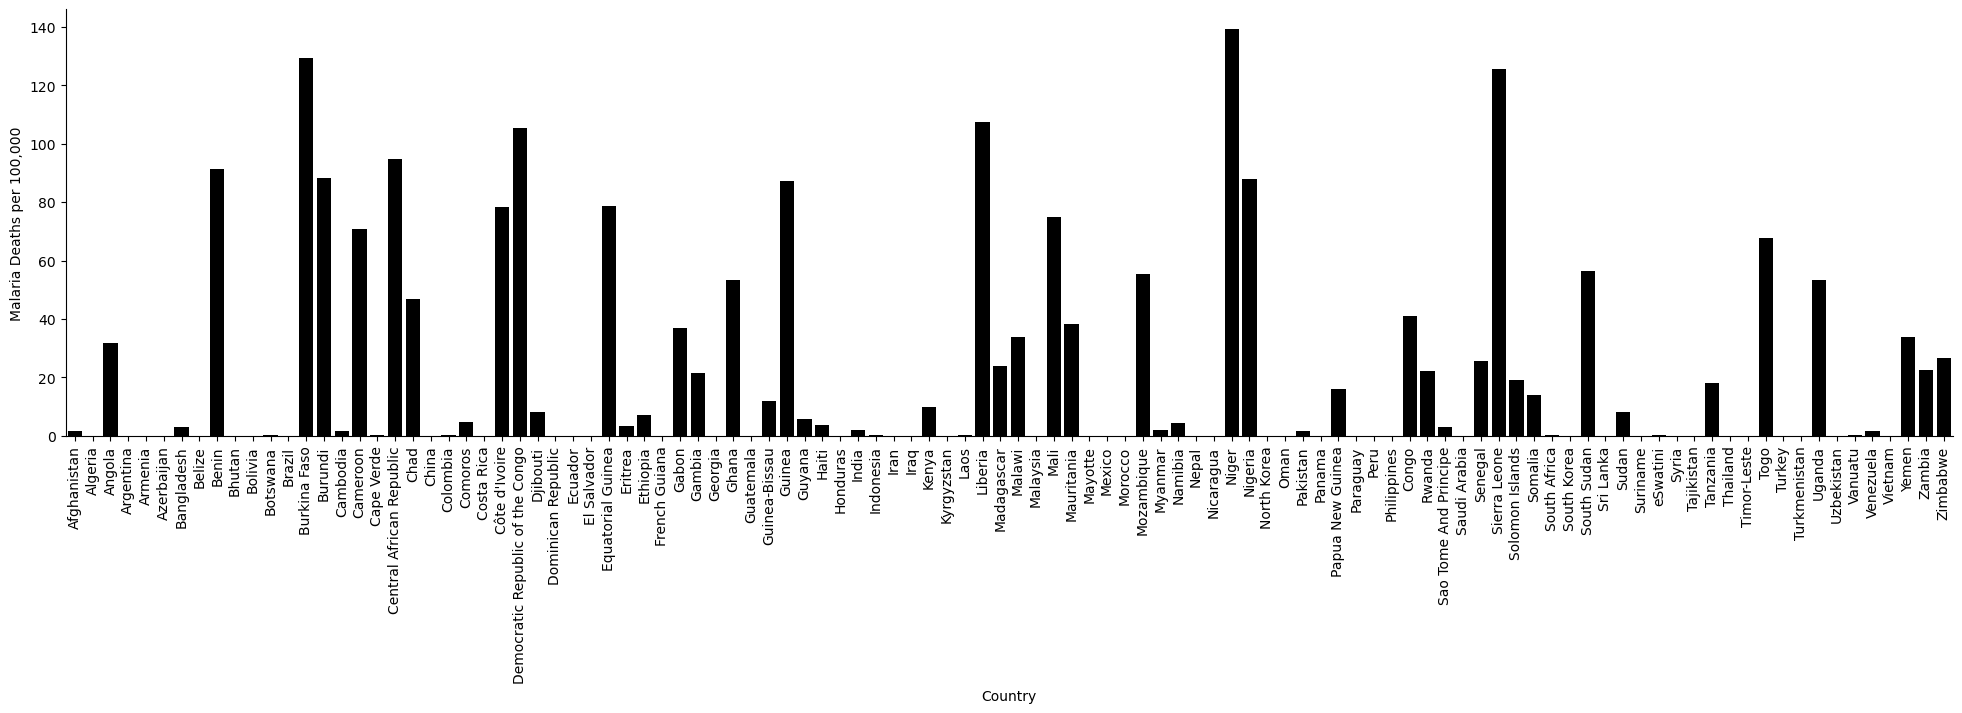

In [18]:
sns.catplot(data=malaria_df_2017, x="Name", y="Value", kind='bar', height=5, aspect=4, color='black');
plt.xticks(rotation=90);
plt.xlabel('Country')
plt.ylabel('Malaria Deaths per 100,000');

# Choropleth plots

Choropleth plots are used to display data that is divided into geographic regions, such as countries, states, or provinces. They allow for a quick comparison of the data across countries or regions and can be used to identify patterns and trends that may not be immediately obvious from looking at raw data.

In [23]:
import plotly.express as px
# Create a choropleth map
fig = px.choropleth(malaria_df_2017, locations='Name', locationmode='country names', color='Value', title='Deaths per 100,000 from P falciparum malaria', scope='world', color_continuous_scale='Reds')
fig.show()

# Always explore interactions and relationships between different variables



In [20]:
datasaurus=pd.read_csv('datasaurus.csv')
display(datasaurus.head())

,variable_A,variable_B,variable_C,variable_D,variable_E,variable_F,variable_G,variable_H
0,55.3846,97.1795,58.213608,91.881892,51.203891,83.339777,52.872021,97.343223
1,51.5385,96.0256,58.196054,92.214989,58.974470,85.499818,59.014144,93.574875
2,46.1538,94.4872,58.718231,90.310532,51.872073,85.829738,56.375109,96.305148
3,42.8205,91.4103,57.278373,89.907607,48.179931,85.045117,37.839200,94.359443
4,40.7692,88.3333,58.082020,92.008145,41.683200,84.017941,39.885373,90.634662


Text(0, 0.5, 'Value (units)')

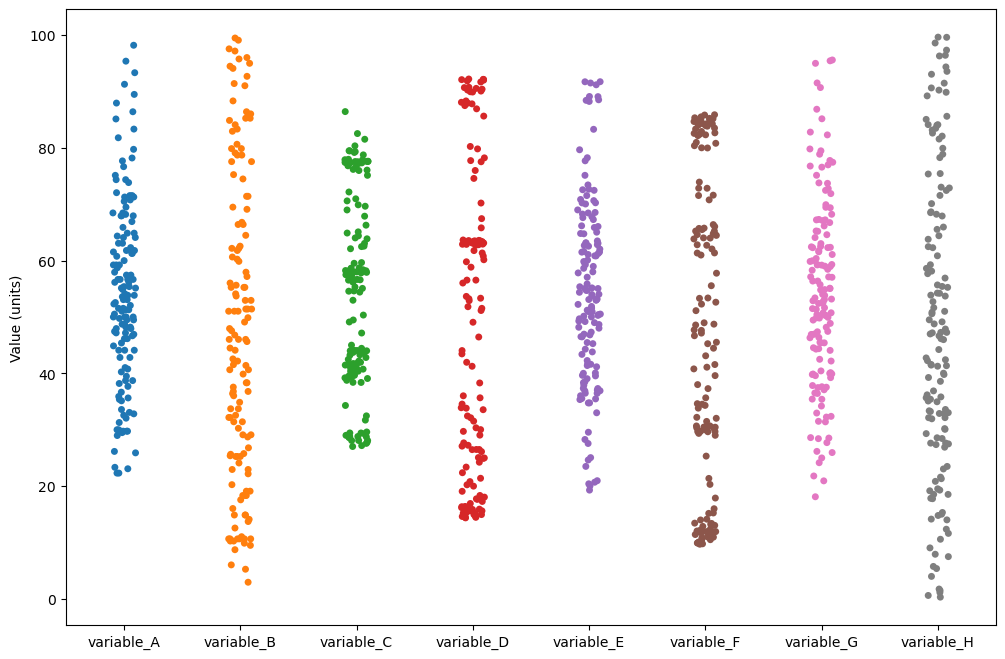

In [21]:
# Swarmplot
sns.stripplot(data=datasaurus)
plt.ylabel("Value (units)")

/Users/graeme/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



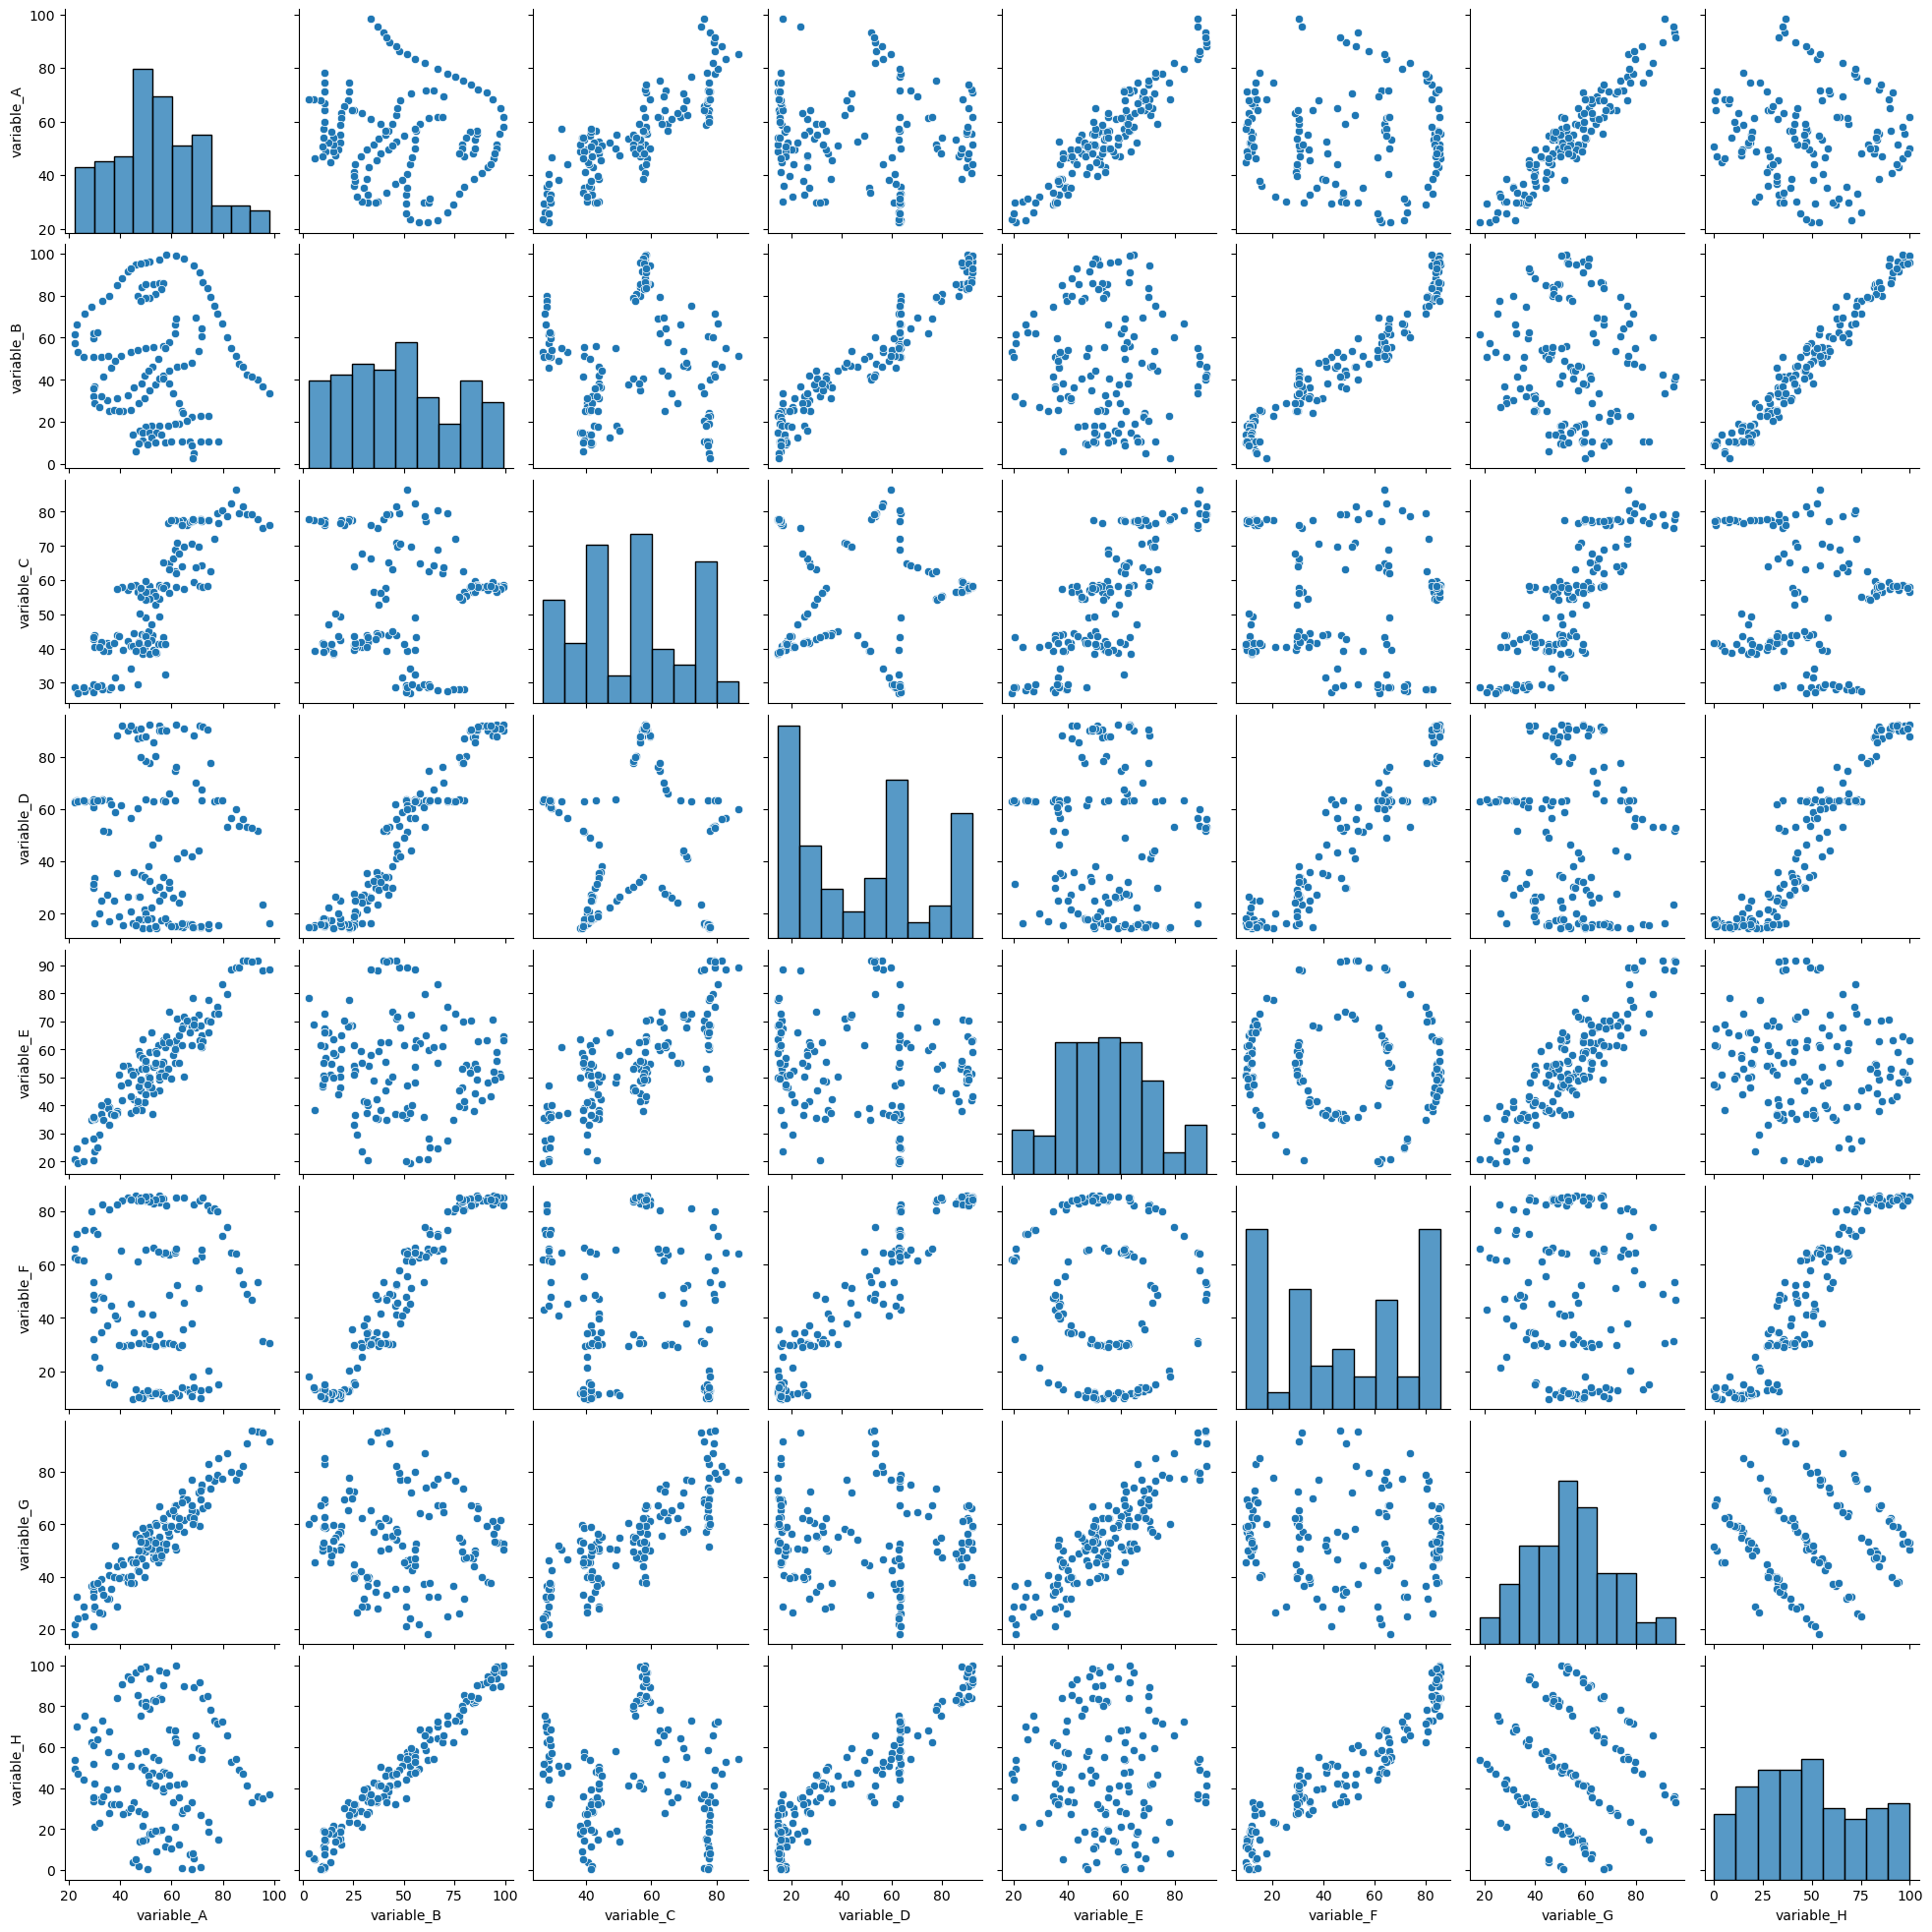

In [22]:
datasaurus=pd.read_csv('datasaurus.csv')
sns.pairplot(datasaurus)
plt.show()